# Prep Course Unit 2.2.4 Challenge - Emma

## The dataset
The data I used here was part of the official datasets used on the Medicare.gov Nursing Home Compare Website provided by the Centers for Medicare & Medicaid Services. The data was last updated on Apr 25, 2018, and contains results from Year 2017.


This dataset includes data on many different attributes of the nursing home rating system.
Among those, the relevant variable used in this analysis are:

__PROVNUM__ - Federal Provider Number

__STATE__ - Provider State

__RESTOT__ - Average Number of Residents per Day

__BEDCERT__ - Number of Certified Beds

__OVERALL_RATING__ - Overall Rating

__TOTHRD__ - Reported Total Nurse Staffing Hours per Resident per Day

__PTHRD__ - Reported Physical Therapist Staffing Hours per Resident Per Day

__WEIGHTED_ALL_CYCLES_SCORE__ - Total Weighted Health Inspection Score

More detailed description of the nursing home rating system can be found in the [Technical User's Guide](https://www.cms.gov/medicare/provider-enrollment-and-certification/certificationandcomplianc/downloads/usersguide.pdf).

Now, let's load the data and clean it a little bit:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load data
df = pd.read_csv('Challenge_dataset.csv', index_col='PROVNUM')

#Removing data with missing values
df_nona = df.dropna()

#Check the column types
df_nona.dtypes


STATE                         object
RESTOT                       float64
BEDCERT                        int64
OVERALL_RATING               float64
TOTHRD                       float64
PTHRD                        float64
WEIGHTED_ALL_CYCLES_SCORE     object
dtype: object

It looks like one of the columns, "WEIGHTED_ALL_CYCLES_SCORE", which should be a continuous variable of float type, is object type. So let's change that:

In [2]:
#Changing 'WEIGHTED_ALL_CYCLES_SCORE' from object type to float
df_nona['WEIGHTED_ALL_CYCLES_SCORE'] = df_nona['WEIGHTED_ALL_CYCLES_SCORE'].apply(pd.to_numeric)


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now that our data is kind of clean. We can start exploring.

## Distribution of the variables
First thing first, we can check the distribution of all the applicable variables of our data. This visual check can guide us in future statistical analyses if needed.

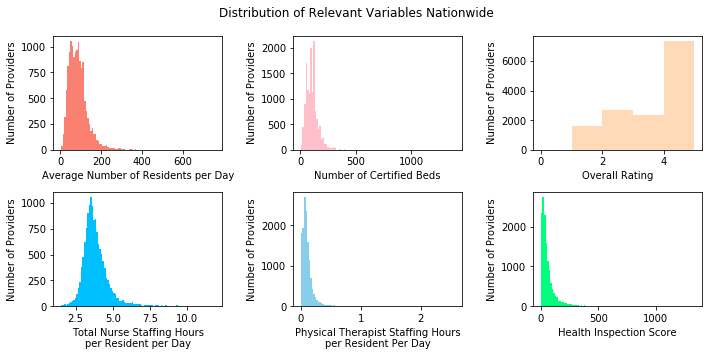

In [3]:
#Check the distribution of variables on national level.
fig = plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.hist(df_nona['RESTOT'], bins=100, color='salmon')
plt.xlabel('Average Number of Residents per Day')
plt.ylabel('Number of Providers')

plt.subplot(2, 3, 2)
plt.hist(df_nona['BEDCERT'], bins=100, color='pink')
plt.xlabel('Number of Certified Beds')
plt.ylabel('Number of Providers')

plt.subplot(2, 3, 3)
plt.hist(df_nona['OVERALL_RATING'], bins=np.arange(0, 6), color='peachpuff')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Providers')

plt.subplot(2, 3, 4)
plt.hist(df_nona['TOTHRD'], bins=100, color='deepskyblue')
plt.xlabel('Total Nurse Staffing Hours\nper Resident per Day')
plt.ylabel('Number of Providers')

plt.subplot(2, 3, 5)
plt.hist(df_nona['PTHRD'], bins=100, color='skyblue')
plt.xlabel('Physical Therapist Staffing Hours\nper Resident Per Day')
plt.ylabel('Number of Providers')

plt.subplot(2, 3, 6)
plt.hist(df_nona['WEIGHTED_ALL_CYCLES_SCORE'], bins=100, color='springgreen')
plt.xlabel('Health Inspection Score')
plt.ylabel('Number of Providers')

plt.suptitle('Distribution of Relevant Variables Nationwide')
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

Unfortunately, it looks like most of the variables seem to be skewed from a normal distribution. "Total Nurse Staffing Hours per Resident per Day" may be the closest to normal distribution among all. We will keep this in mind for future analysis.

*Sidenote: just by the look of it, it seems like the health inspection score distribution is exactly the opposite of the overall rating. So it got me thinking, maybe they have an inverse relationship. When I search online for the details of this rating system, I did find out that higher health inspection score reflects more health deficiency, and unsurprisingly, that would lead to a lower overall rating.*


## Which state has the most 5-star overall rating providers?
Now we can ask some specific questions based on the data. For example, say we want to know which state has the most good quality nursing home providers that have five star overall rating.

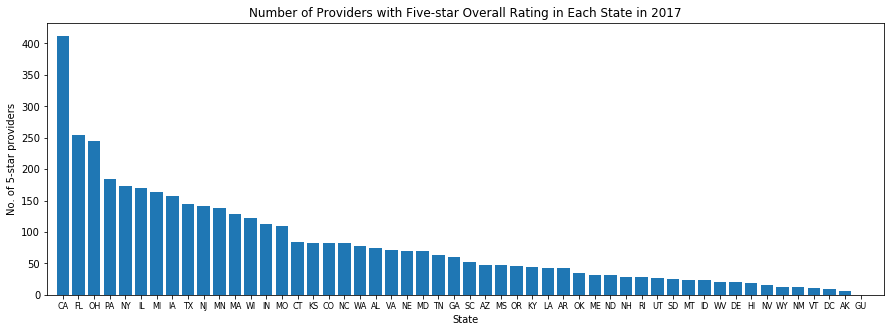

In [4]:
#Which state has the most 5-star overall rating providers?
five_star = df_nona.loc[lambda df: df_nona['OVERALL_RATING'] == 5, :]
count = pd.Series(pd.Categorical(five_star['STATE'], categories=df_nona['STATE'].unique()))
five_star_provider = pd.DataFrame()
five_star_provider['STATE'] = count.value_counts().keys().tolist()
five_star_provider['Five_Star_No'] = count.value_counts().tolist()

plt.figure(figsize=(15, 5))
label = five_star_provider['STATE']
index = np.arange(len(label))
width = 0.8
plt.bar(index, five_star_provider['Five_Star_No'], width)
plt.xlabel('State', fontsize=10)
plt.ylabel('No. of 5-star providers', fontsize=10)
plt.xticks(index, label, fontsize=8,)
plt.title('Number of Providers with Five-star Overall Rating in Each State in 2017')
plt.gca().set_xlim(left=-1, right=len(index)+0.5)
plt.show()

Wow. California has way more five-star nursing homes than other state! No wonder everybody I know wants to move to California for retirement. Not surprisingly, the next best place for retirement, Florida, falls just behind California. What's surprising to me is the next two, Ohio and Pennsylvania. Didn't think they would do so well.

To conclude, the top 10 states that have the most 5-star overall rating providers are: CA, FL, OH, PA, NY, IL, MI, IA, TX, NJ.

However, these results could also be due to the fact that CA and FL just have more nursing homes in general compared to other states. So let's see if that's true.

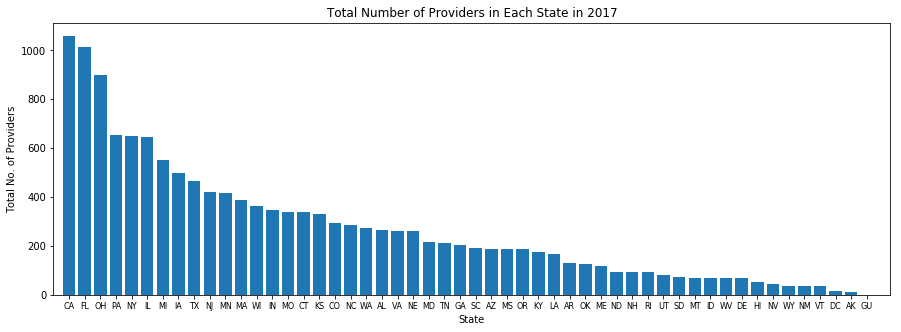

In [5]:
#How many providers in total does each state have?
five_star_provider['Total_Provider_No'] = df_nona['STATE'].value_counts().tolist()

plt.figure(figsize=(15, 5))
label = five_star_provider['STATE']
index = np.arange(len(label))
width = 0.8
plt.bar(index, five_star_provider['Total_Provider_No'], width)
plt.xlabel('State', fontsize=10)
plt.ylabel('Total No. of Providers', fontsize=10)
plt.xticks(index, label, fontsize=8,)
plt.title('Total Number of Providers in Each State in 2017')
plt.gca().set_xlim(left=-1, right=len(index)+0.5)
plt.show()

Aha! No wonder. Just as we speculated.

So what we really want to know then, is the percentage of five-star providers in each state, rather than the exact number. Let's take a look.

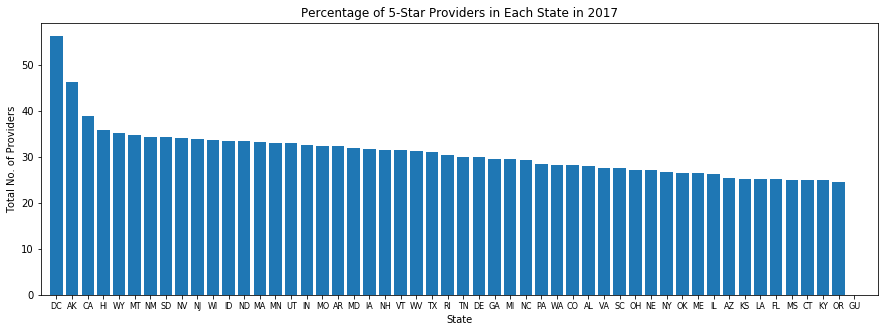

In [6]:
#What are the percentage of 5-star providers in each state?
five_star_provider['Percentage_five_star'] = (five_star_provider['Five_Star_No']/five_star_provider['Total_Provider_No']) * 100
five_star_provider = five_star_provider.sort_values('Percentage_five_star', ascending=False)

plt.figure(figsize=(15, 5))
label = five_star_provider['STATE']
index = np.arange(len(label))
width = 0.8
plt.bar(index, five_star_provider['Percentage_five_star'], width)
plt.xlabel('State', fontsize=10)
plt.ylabel('Total No. of Providers', fontsize=10)
plt.xticks(index, label, fontsize=8,)
plt.title('Percentage of 5-Star Providers in Each State in 2017')
plt.gca().set_xlim(left=-1, right=len(index)+0.5)
plt.show()

Now the top 10 becomes: DC, AK, CA, HI, WY, MT, NM, SD, NV, NJ.

Therefore, although CA has way more nursing homes than others, and therefore has more five-star ones as well, you have a higher chance of walking into a random nursing home in DC, and it being a five-star one.


## How did each state do on the health inspection in 2017?
Now, we know the overall rating comprises evaluation of different aspects of the nursing homes, such as health inspection, staffing condition and a multi-metric quality measurement. Say we want to know how each state did on the health inspection in 2017.

*Reminder: higher health inspection score reflects more health deficiency.*

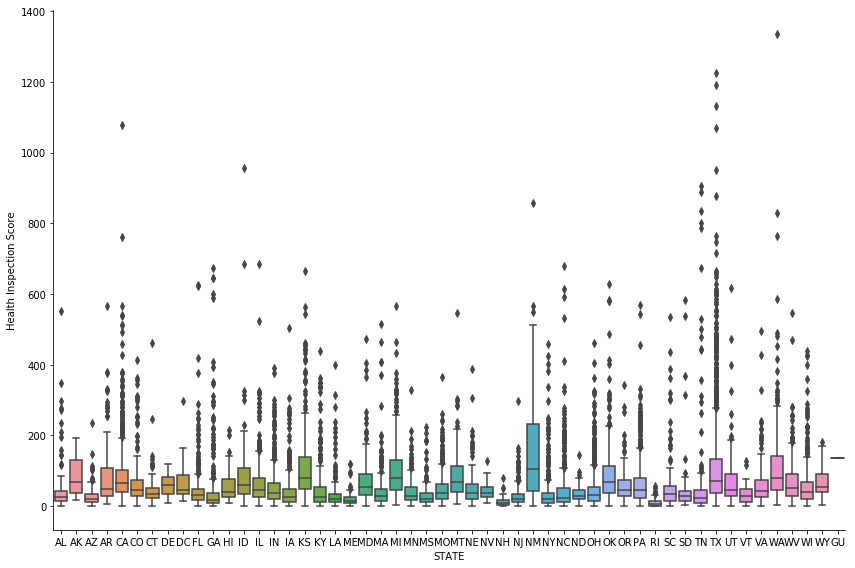

In [7]:
#How did each state do on the health inspection in 2017?
sns.factorplot(kind='box',        # Boxplot
               y='WEIGHTED_ALL_CYCLES_SCORE',       # Y-axis - values for boxplot
               x='STATE',        # X-axis - first factor
               data=df_nona,        # Dataframe 
               size=8,            # Figure size (x100px)      
               aspect=1.5,        # Width = size * aspect 
               legend_out=False)  # Make legend inside the plot
plt.ylabel('Health Inspection Score')
plt.show()

This graph is a bit busy, and contains much information. For now, we are just wondering about the general situation nationwide. If we need to compare several specific states, we can also easily do that with the same method.

Just from a quick look, we can already see that the states which have the highest percentage of 5-star providers, DC and AK, have much less high-score outliers than others.


## Is there a relationship between health inspection scores and overall ratings?
Now I'm really curious. Although we can kind of speculate there is some relationship between health inspection scores and overall ratings, we don't know for sure. We haven't seen it. Seeing is believing, right?

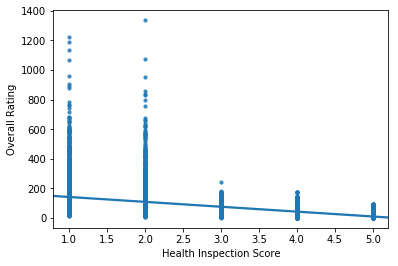

In [8]:
#Is there a relationship between health inspection scores and overall ratings?
sns.regplot(x='OVERALL_RATING', y='WEIGHTED_ALL_CYCLES_SCORE',
            data=df_nona, scatter_kws={'s':10})
plt.xlabel('Health Inspection Score')
plt.ylabel('Overall Rating')
plt.show()

Meh. Somewhat. There seems to be an inverse correlation between the two. But before doing any statistical analysis, we can't say for sure.

## Is there any relationship between health inspection scores and the number of certified beds or residents, or the staffing situation?
Now we are interested to see if the facility and staffing situation in each provider affect its health inspection score. Since CA has the most providers, let's focus on CA for now. We can also do other states or on the national level in the same way.

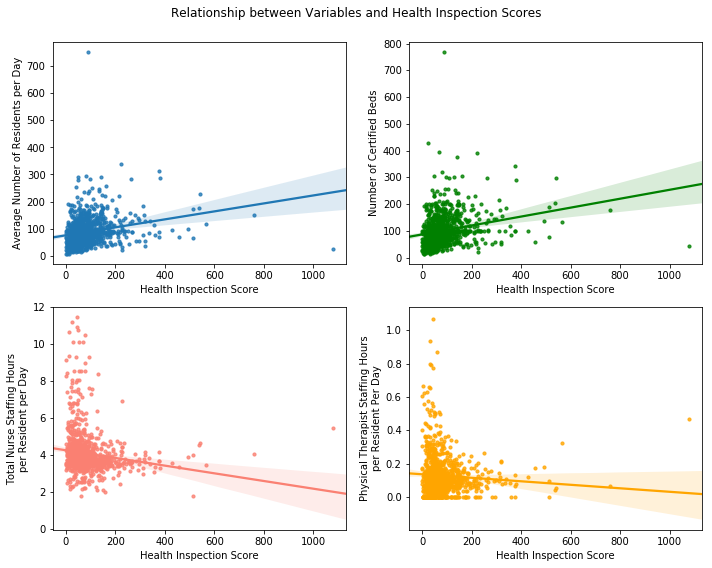

In [9]:
#Let's focus on the data in California.
ca = df_nona[df_nona['STATE'] == 'CA']

#Is there any relationship between health inspection scores and
#the number of certified beds or residents, or the staffing situation?
fig = plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.regplot(x='WEIGHTED_ALL_CYCLES_SCORE', y='RESTOT', data=ca, scatter_kws={'s':10})
plt.xlabel('Health Inspection Score')
plt.ylabel('Average Number of Residents per Day')

plt.subplot(2, 2, 2)
sns.regplot(x='WEIGHTED_ALL_CYCLES_SCORE', y='BEDCERT', data=ca,
            scatter_kws={'s':10}, color='g')
plt.xlabel('Health Inspection Score')
plt.ylabel('Number of Certified Beds')

plt.subplot(2, 2, 3)
sns.regplot(x='WEIGHTED_ALL_CYCLES_SCORE', y='TOTHRD', data=ca,
            scatter_kws={'s':10}, color='salmon')
plt.xlabel('Health Inspection Score')
plt.ylabel('Total Nurse Staffing Hours\nper Resident per Day')

plt.subplot(2, 2, 4)
sns.regplot(x='WEIGHTED_ALL_CYCLES_SCORE', y='PTHRD', data=ca,
            scatter_kws={'s':10}, color='orange')
plt.xlabel('Health Inspection Score')
plt.ylabel('Physical Therapist Staffing Hours\nper Resident Per Day')

plt.suptitle('Relationship between Variables and Health Inspection Scores')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()


Interesting. It looks like number of residents and number of beds have a positive correlation with the health inspection score, while the nurse and physical therapist staffing hours negatively correlate with the score.

It is not surprising, as the more residents a nursing home has, the more health deficiency complaints they may have due to insufficient care, thus increasing the health inspection score. And increasing staffing may resolve this situation, and may therefore lower the health inspection score.


## Is there any relationship between overall ratings and the number of certified beds or residents, or the staffing situation?
Now we can do the same for overall ratings, see if these factors affect it.

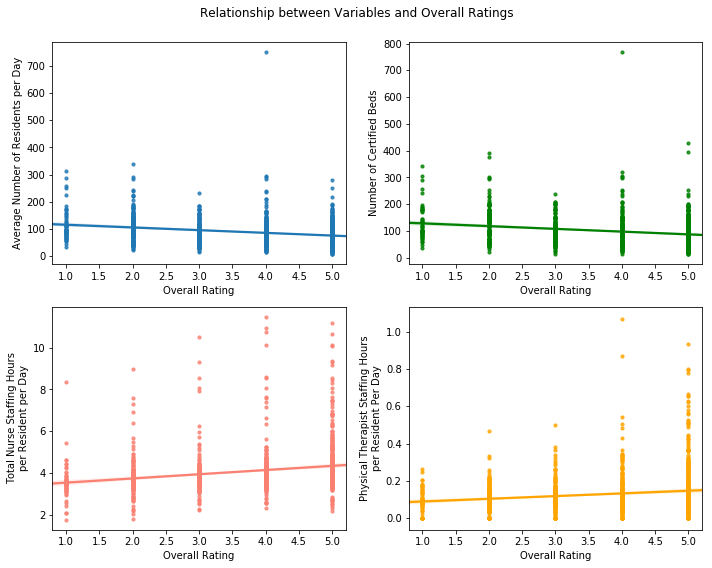

In [10]:
#Is there any relationship between overall ratings and
#the number of certified beds or residents, or the staffing situation?
fig = plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.regplot(x='OVERALL_RATING', y='RESTOT', data=ca, scatter_kws={'s':10})
plt.xlabel('Overall Rating')
plt.ylabel('Average Number of Residents per Day')

plt.subplot(2, 2, 2)
sns.regplot(x='OVERALL_RATING', y='BEDCERT', data=ca,
            scatter_kws={'s':10}, color='g')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Certified Beds')

plt.subplot(2, 2, 3)
sns.regplot(x='OVERALL_RATING', y='TOTHRD', data=ca,
            scatter_kws={'s':10}, color='salmon')
plt.xlabel('Overall Rating')
plt.ylabel('Total Nurse Staffing Hours\nper Resident per Day')

plt.subplot(2, 2, 4)
sns.regplot(x='OVERALL_RATING', y='PTHRD', data=ca,
            scatter_kws={'s':10}, color='orange')
plt.xlabel('Overall Rating')
plt.ylabel('Physical Therapist Staffing Hours\nper Resident Per Day')

plt.suptitle('Relationship between Variables and Overall Ratings')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

Ha, you can see that the trends seem to have reversed, compared to the last graph of health inspection score.

This makes a lot of sense, because we know from earlier that health inspection score has an inverse relationship with overall rating.

We can delve even more and a lot deeper into the data, but for now, let's stop here. I love data science!